## Using this code it is possible to reproduce all plots of the paper and the appendix

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif']=['Computer Modern']
from utils import my_load, sorted_dictionary, real_units

## Average population

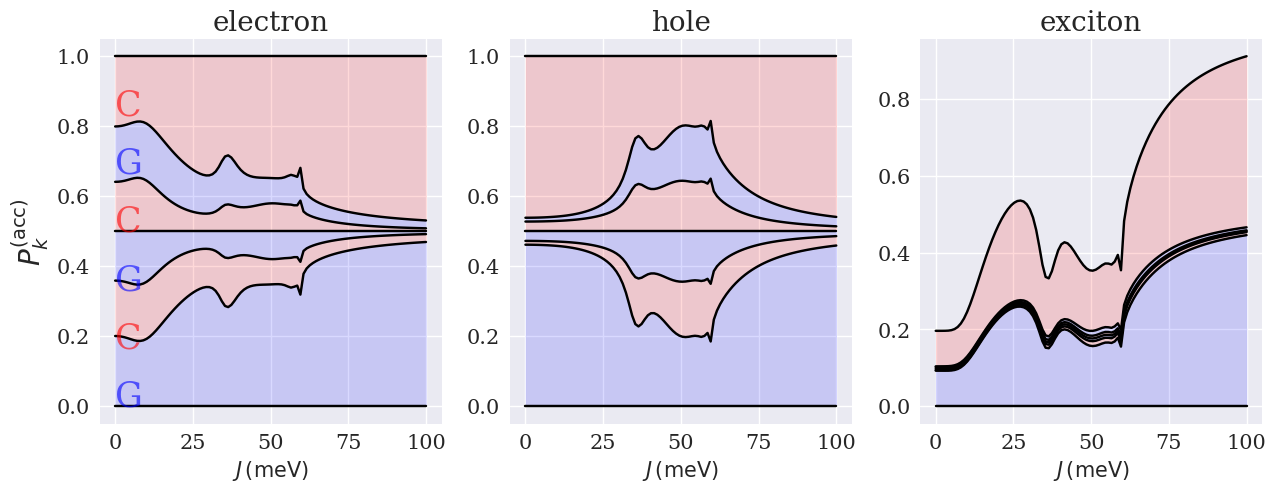

In [6]:
# Fig. 5(a), 5(b) and S3
from DNA import get_pop_lists
from DNA.plotting import plot_average_pop

DNAstring = 'GCGCGC' # 'GCGCG', 'GGGGG'
J_max, J_steps = 1, 100
J_list = np.linspace(0,J_max,J_steps)
pop_lists = get_pop_lists(DNAstring, J_list, init_base=0, Ham_kwargs={'description':'base_pair', 'source':'Simserides2014', 'relaxation':False})
plot_average_pop(DNAstring, pop_lists, J_list, save_fig = False)

## Lifetime and dipole

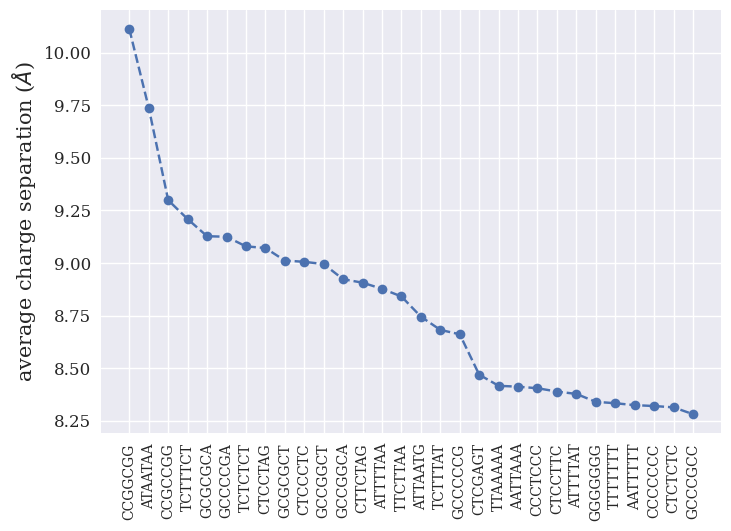

In [3]:
# Fig. 3(a), 3(b), 6, S1

save_fig = False
observable = 'dipole'
J = 0
top_num = 30

directory = 'stored_data/stored_results/Mirko/'+observable+'_J'
my_dict = sorted_dictionary( my_load(directory+f'{J}') )

DNA_sequence_list = list(my_dict.keys())[:top_num]
if observable == 'lifetime': my_list = np.array(list(my_dict.values()))[:top_num]*real_units/1000
elif observable == 'dipole': my_list = list(my_dict.values())[:top_num]

fig, ax = plt.subplots()
ax.plot(DNA_sequence_list,my_list,'o--')
if observable == 'lifetime': ax.set_ylabel('exciton lifetime (ps)',fontsize=15) 
elif observable == 'dipole': ax.set_ylabel('average charge separation ($\AA$)',fontsize=15) 
ax.set_xticks(DNA_sequence_list)
ax.set_xticklabels(labels=DNA_sequence_list,rotation=90)
plt.yticks(fontsize=12),plt.xticks(fontsize=10)
if save_fig: plt.savefig(f'plots/top_30_J{J}_'+observable+'.pdf')

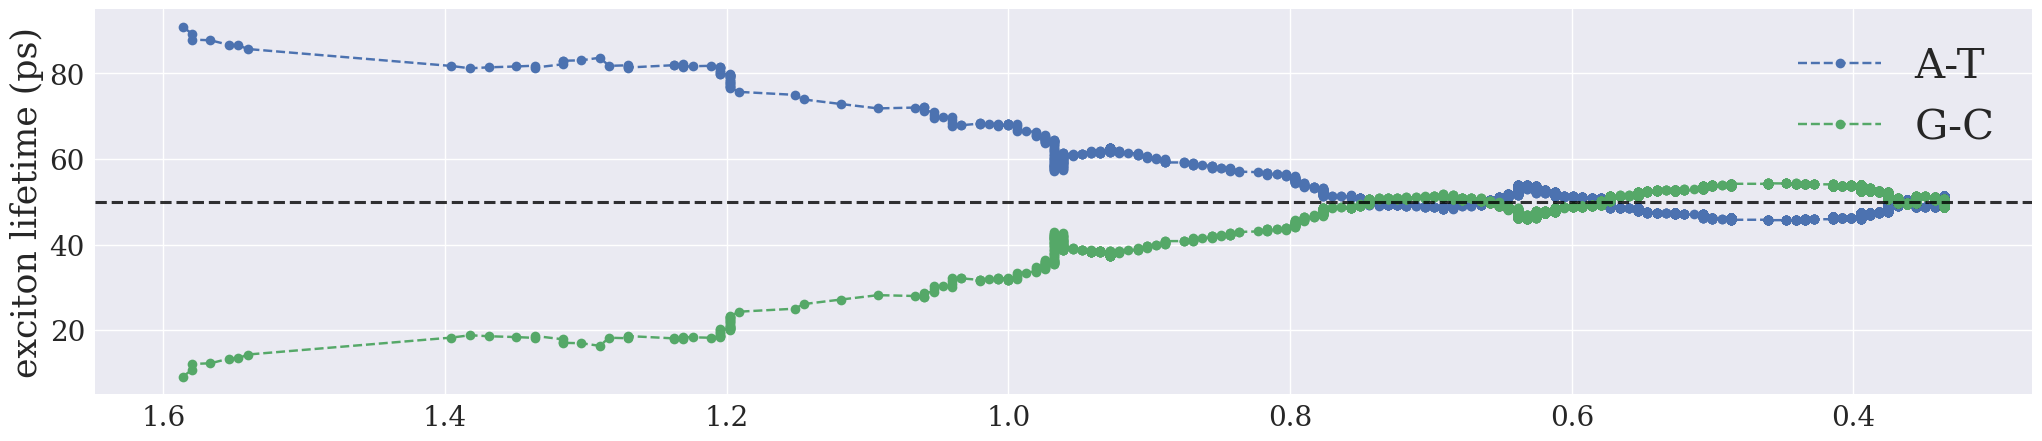

In [8]:
# Fig. 4, 8 
from DNA.relaxation import base_counter

J=1
start, end = 10, 4**7
save_fig = False
observable = 'lifetime'
directory = 'stored_data/stored_results/Mirko/'+observable+'_J'

my_dict = sorted_dictionary( my_load(directory+f'{J}') )
val_list, A_list, T_list, G_list, C_list = base_counter(my_dict)
AT_list, GC_list = A_list[start:end] + T_list[start:end], G_list[start:end] + C_list[start:end]
val_list = val_list[start:end]
if observable == 'lifetime': val_list = np.array(val_list)*real_units/1000

fig,ax=plt.subplots(1,1,figsize=(25,5))
ax.plot(val_list, AT_list*100,'o--')
ax.plot(val_list, GC_list*100,'o--')

ax.set_ylabel('Percentage',fontsize=25)
if observable == 'lifetime': ax.set_ylabel('exciton lifetime (ps)',fontsize=25) 
elif observable == 'dipole': ax.set_ylabel('average charge separation ($\AA$)',fontsize=25) 
ax.invert_xaxis()
ax.legend(['A-T','G-C'],prop={'size': 30}, loc='upper right')
ax.axhline(50,linestyle='--',color='black',alpha=0.8,lw=2.2)
plt.xticks(fontsize=20), plt.yticks(fontsize=20)
if save_fig: plt.savefig(f'plots/relative_distribution_J{J}_'+observable+'.pdf')

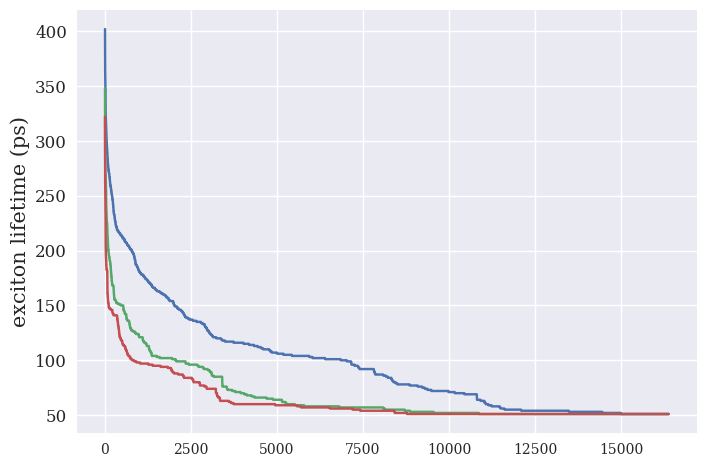

In [9]:
# Fig. S2

save_fig = False
observable = 'lifetime'

directory = 'stored_data/stored_results/Mirko/'+observable+'_J'
for J in [0,0.5,1]:
    my_dict = sorted_dictionary( my_load(directory+f'{J}') )
    plt.plot(my_dict.values())
if observable == 'lifetime': plt.ylabel('exciton lifetime (ps)',fontsize=15) 
elif observable == 'dipole': plt.ylabel('average charge separation ($\AA$)',fontsize=15) 
plt.yticks(fontsize=12)
if save_fig: plt.savefig('plots/'+observable+'_all.pdf')

## Stability (Correlations)

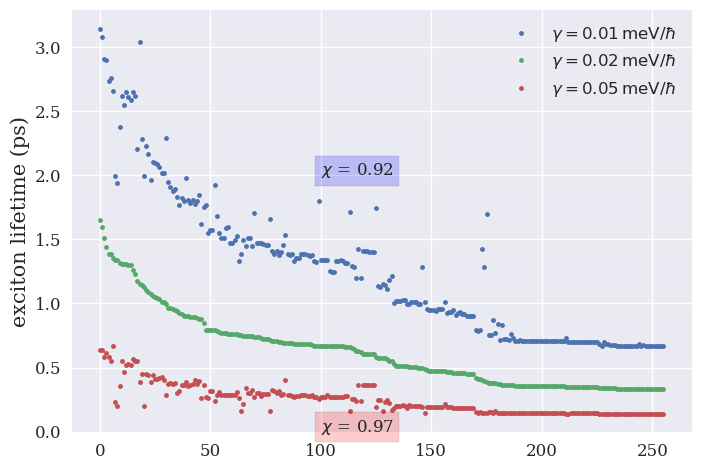

In [10]:
# Fig. S5
from DNA import get_sorted_dict, get_correlation

dominant_rate = 0.02
save_fig = False
directory = 'stored_data/stored_results/Mirko/lifetime_relax'

dominant_filepath = directory+f'{dominant_rate}'
for i, relaxation_rate in enumerate([0.01,0.02,0.05]):
    filepath = directory+f'{relaxation_rate}'
    my_dict = get_sorted_dict( dominant_filepath, filepath )
    my_list = np.array(list(my_dict.values()))
    plt.plot( my_list*real_units/1000, marker = '.', linestyle='' )
chi_1 = np.round( get_correlation(dominant_filepath, directory+f'{0.01}'), 2)
chi_2 = np.round( get_correlation(dominant_filepath, directory+f'{0.05}'), 2)
plt.text(100,0,f'$\chi$ = {chi_1}',fontsize=12, bbox=dict(facecolor='red', alpha=0.2))
plt.text(100,2,f'$\chi$ = {chi_2}',fontsize=12, bbox=dict(facecolor='blue', alpha=0.2))
plt.legend(['$\gamma = 0.01\,\mathrm{meV}/\hbar$','$\gamma = 0.02\,\mathrm{meV}/\hbar$','$\gamma = 0.05\,\mathrm{meV}/\hbar$'],fontsize=12)
plt.ylabel('exciton lifetime (ps)',fontsize=15) 
plt.yticks(fontsize=12),plt.xticks(fontsize=12)
if save_fig: plt.savefig('plots/stability_relax_rates.pdf')
plt.show()

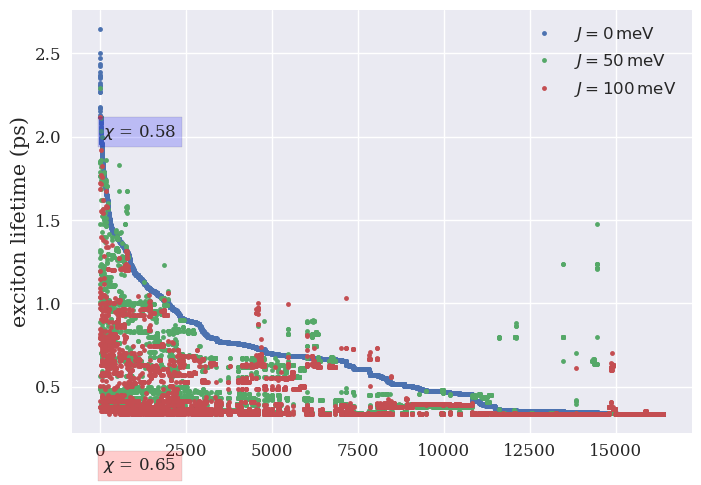

In [11]:
# plot not in the paper 
from DNA import get_sorted_dict, get_correlation

dominant_J = 0
save_fig = False
observable = 'lifetime'

directory = 'stored_data/stored_results/Mirko/'+observable+'_J'
dominant_filepath = directory+f'{dominant_J}'
for i, J in enumerate([0,0.5,1]):
    filepath = directory+f'{J}'
    my_dict = get_sorted_dict( dominant_filepath, filepath )
    my_list = np.array(list(my_dict.values()))
    if observable == 'lifetime': my_list *= real_units/1000
    plt.plot( my_list, marker = '.', linestyle='' )
chi_1 = np.round( get_correlation(dominant_filepath, directory+f'{0.5}'), 2)
chi_2 = np.round( get_correlation(dominant_filepath, directory+f'{1}'), 2)
plt.text(100,0,f'$\chi$ = {chi_1}',fontsize=12, bbox=dict(facecolor='red', alpha=0.2))
plt.text(100,2,f'$\chi$ = {chi_2}',fontsize=12, bbox=dict(facecolor='blue', alpha=0.2))
plt.legend(['$J = 0\,\mathrm{meV}$','$J = 50\,\mathrm{meV}$','$J = 100\,\mathrm{meV}$'],fontsize=12)
if observable == 'lifetime': plt.ylabel('exciton lifetime (ps)',fontsize=15) 
elif observable == 'dipole': plt.ylabel('average charge separation ($\AA$)',fontsize=15) 
plt.yticks(fontsize=12),plt.xticks(fontsize=12)
if save_fig: plt.savefig('plots/stability_interaction_'+observable+'.pdf')
plt.show()

C:\Users\Dennis Herb\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Dennis Herb\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\Dennis Herb\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


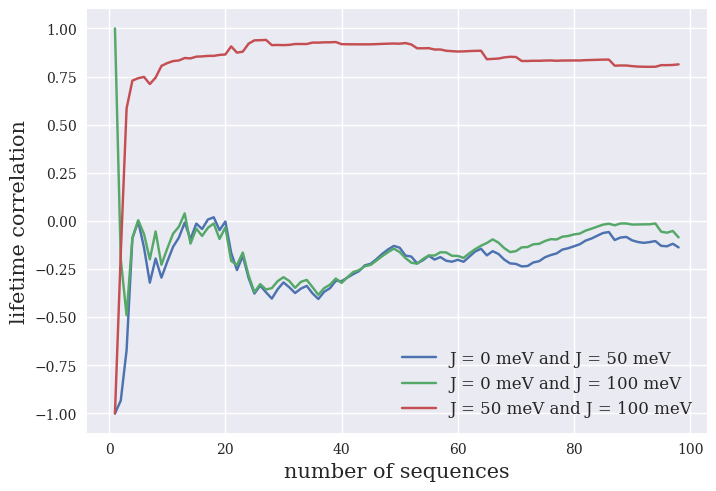

In [12]:
# Fig. 7, S5
from DNA import get_sorted_dict

dominant_J = 0
num_sequences = 100
save_fig = True
observable = 'dipole'

directory = 'stored_data/stored_results/Mirko/'+observable+'_J'
dominant_filepath = directory+f'{dominant_J}'
for J1,J2 in [[0,0.5],[0,1],[0.5,1]]:
    filepath1, filepath2 = directory+f'{J1}', directory+f'{J2}'
    A = get_sorted_dict(dominant_filepath, filepath1)
    B = get_sorted_dict(dominant_filepath, filepath2)
    corr_list=[]
    for x in range(1,num_sequences):
        corr_list.append( np.corrcoef(list(B.values())[:x],list(A.values())[:x])[0, 1] )
    plt.plot(corr_list)

plt.legend(['J = 0 meV and J = 50 meV','J = 0 meV and J = 100 meV','J = 50 meV and J = 100 meV'],fontsize=12)
plt.ylabel('lifetime correlation',fontsize=15)
plt.xlabel('number of sequences',fontsize=15)
if save_fig: plt.savefig('plots/correlations_'+observable+'.pdf')